<a href="https://colab.research.google.com/github/MedhaParhy/HandwrittenDigitsMnist/blob/main/digitsMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [3]:
digits_mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


The load_data() function already has data separated into testing and training sets

In [4]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [5]:
train_images.shape

(60000, 28, 28)

Training set includes 60,000 images with 28x28 pixels

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

Testing set includes 60,000 images with 28x28 pixels

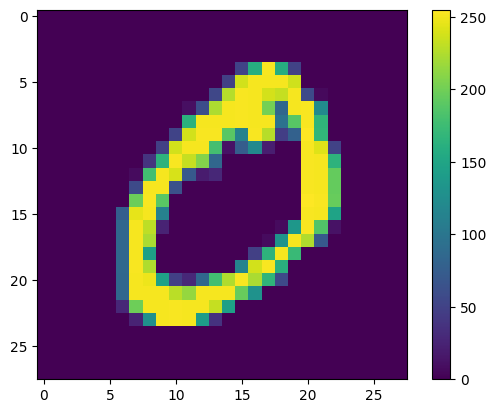

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Images are colored with pixel values between 0-255, which must be scaled to be between 0 and 1

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

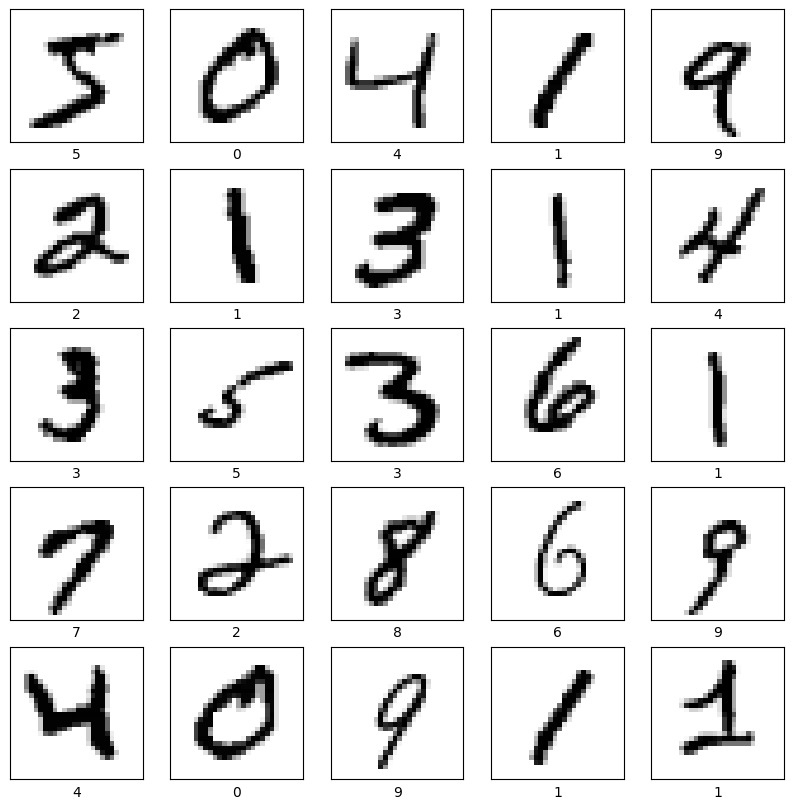

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Flatten - transforms 2d image (28x28) to 1d array (784)

Dense Layers - 784 to 128, then 128 to 10, uses function output = activation(dot(input, kernel) + bias)
Dense Layer 2 doesn't have activation specified so it doesn't use an activation function

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

optimizer - algorithm used to change weights

loss function - measures model accuracy

metrics - accuracy - calculates how often prediction matches label

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2609 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1155 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0805 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0596 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0455 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0366 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0294 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

Feeds training images, makes prediction, and tries to reduce the loss. The process continues for 10 run-throughs of the entire training data-set

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0837 - accuracy: 0.9779 - 738ms/epoch - 2ms/step

Test accuracy: 0.9779000282287598


Checks the accuracy on the testing set, which is lower than the training set due to overfitting

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Softmax function turns logits into probabilities

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([1.8672706e-08, 8.9113286e-11, 1.7583993e-08, 6.6820512e-06,
       1.2275821e-11, 9.9378554e-11, 3.7730397e-16, 9.9998540e-01,
       1.2088650e-09, 7.8264420e-06], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

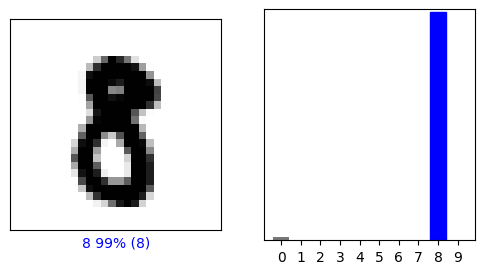

In [32]:
i = 3987
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()